In [ ]:
import pandas as pd
#Linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Load the dataset into a DataFrame
df = pd.read_excel("volkwagen_mtp_data.xlsx")

# Remove the unwanted columns
df = df.drop(columns=['manufacturer', 'model', 'version', 'fuel_date', 'fuel_type'])

df['tire_type'] = df['tire_type'].replace({'Winter tires': 0, 'Summer tires': 1})
df = df.dropna()
num_rows = df.shape[0]
df.head(10)

,power(kW),trip_distance(km),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
1,85,50.0,12.29,0,0,0,1,Normal,15.5,0,1,47.0,-1.3
2,85,43.0,8.68,0,0,1,1,Normal,18.0,0,1,58.0,1.2
3,85,44.0,1.50,0,0,1,1,Normal,16.1,0,1,43.0,-0.7
4,85,76.0,14.44,0,0,1,0,Normal,19.0,0,1,76.0,2.2
5,85,15.0,6.84,0,1,0,0,Normal,16.1,0,1,23.0,-0.7
6,85,63.0,7.10,0,0,1,0,Fast,18.3,0,1,80.0,1.5
7,85,85.0,15.30,0,0,1,1,Fast,18.0,0,1,47.0,1.2
8,85,71.0,13.77,0,0,0,1,Fast,19.4,0,1,45.0,2.6
9,85,76.0,14.26,0,0,0,1,Normal,15.8,0,1,78.0,-1.0
10,85,80.0,13.08,0,0,0,1,Moderate,14.0,0,0,52.0,-2.8


In [ ]:
df.head(20)

,power(kW),trip_distance(km),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
1,85,50.0,12.29,0,0,0,1,Normal,15.5,0,1,47.0,-1.3
2,85,43.0,8.68,0,0,1,1,Normal,18.0,0,1,58.0,1.2
3,85,44.0,1.50,0,0,1,1,Normal,16.1,0,1,43.0,-0.7
4,85,76.0,14.44,0,0,1,0,Normal,19.0,0,1,76.0,2.2
5,85,15.0,6.84,0,1,0,0,Normal,16.1,0,1,23.0,-0.7
6,85,63.0,7.10,0,0,1,0,Fast,18.3,0,1,80.0,1.5
7,85,85.0,15.30,0,0,1,1,Fast,18.0,0,1,47.0,1.2
8,85,71.0,13.77,0,0,0,1,Fast,19.4,0,1,45.0,2.6
9,85,76.0,14.26,0,0,0,1,Normal,15.8,0,1,78.0,-1.0
10,85,80.0,13.08,0,0,0,1,Moderate,14.0,0,0,52.0,-2.8


In [ ]:
print(f"The DataFrame has {num_rows} rows.")

The DataFrame has 3326 rows.


In [ ]:
df = df.drop(columns=['power(kW)'])

In [ ]:
df.head(40)

,trip_distance(km),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
1,50.0,12.29,0,0,0,1,Normal,15.5,0,1,47.0,-1.3
2,43.0,8.68,0,0,1,1,Normal,18.0,0,1,58.0,1.2
3,44.0,1.50,0,0,1,1,Normal,16.1,0,1,43.0,-0.7
4,76.0,14.44,0,0,1,0,Normal,19.0,0,1,76.0,2.2
5,15.0,6.84,0,1,0,0,Normal,16.1,0,1,23.0,-0.7
6,63.0,7.10,0,0,1,0,Fast,18.3,0,1,80.0,1.5
7,85.0,15.30,0,0,1,1,Fast,18.0,0,1,47.0,1.2
8,71.0,13.77,0,0,0,1,Fast,19.4,0,1,45.0,2.6
9,76.0,14.26,0,0,0,1,Normal,15.8,0,1,78.0,-1.0
10,80.0,13.08,0,0,0,1,Moderate,14.0,0,0,52.0,-2.8


In [ ]:
df = pd.get_dummies(df, columns=['driving_style'])
df = df.astype(int)

In [ ]:
df.head(20)

,trip_distance(km),quantity(kWh),tire_type,city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,driving_style_Fast,driving_style_Moderate,driving_style_Normal
1,50,12,0,0,0,1,15,0,1,47,-1,0,0,1
2,43,8,0,0,1,1,18,0,1,58,1,0,0,1
3,44,1,0,0,1,1,16,0,1,43,0,0,0,1
4,76,14,0,0,1,0,19,0,1,76,2,0,0,1
5,15,6,0,1,0,0,16,0,1,23,0,0,0,1
6,63,7,0,0,1,0,18,0,1,80,1,1,0,0
7,85,15,0,0,1,1,18,0,1,47,1,1,0,0
8,71,13,0,0,0,1,19,0,1,45,2,1,0,0
9,76,14,0,0,0,1,15,0,1,78,-1,0,0,1
10,80,13,0,0,0,1,14,0,0,52,-2,0,1,0


In [ ]:
#Linear regression
from sklearn.metrics import mean_absolute_percentage_error
X = df.drop('trip_distance(km)', axis=1)  # Features
y = df['trip_distance(km)']  # Target variable


# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")
print(f"mape:{mape}")


MAE: 11.777720627467012
MSE: 418.4213130910244
R2 Score: 0.8678875342362293
mape:36598323133231.87


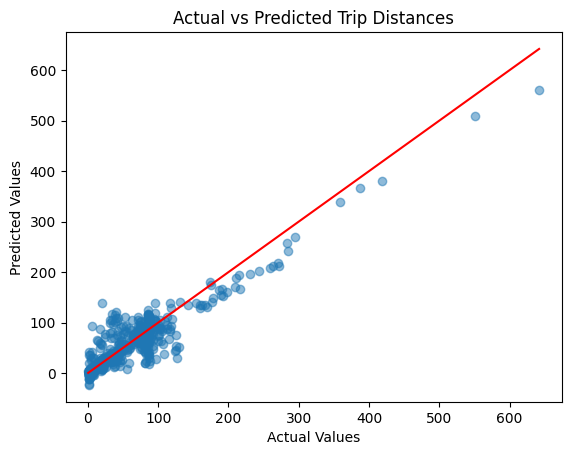

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Predict the values
y_pred = model.predict(X_test)

# Create a scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Trip Distances")

# Plot a line representing perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # diagonal line

plt.show()



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees in the forest

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test,y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print(f"Mape: {mape}")


MAE: 7.753683561184743
MSE: 234.36153966543952
R2 Score: 0.9260026206021595
Mape: 20668563193721.836


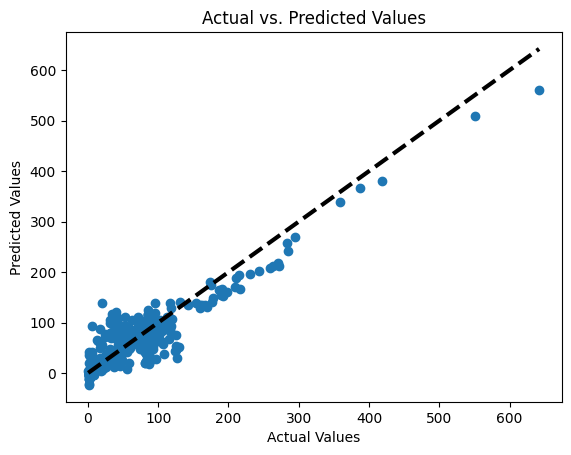

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

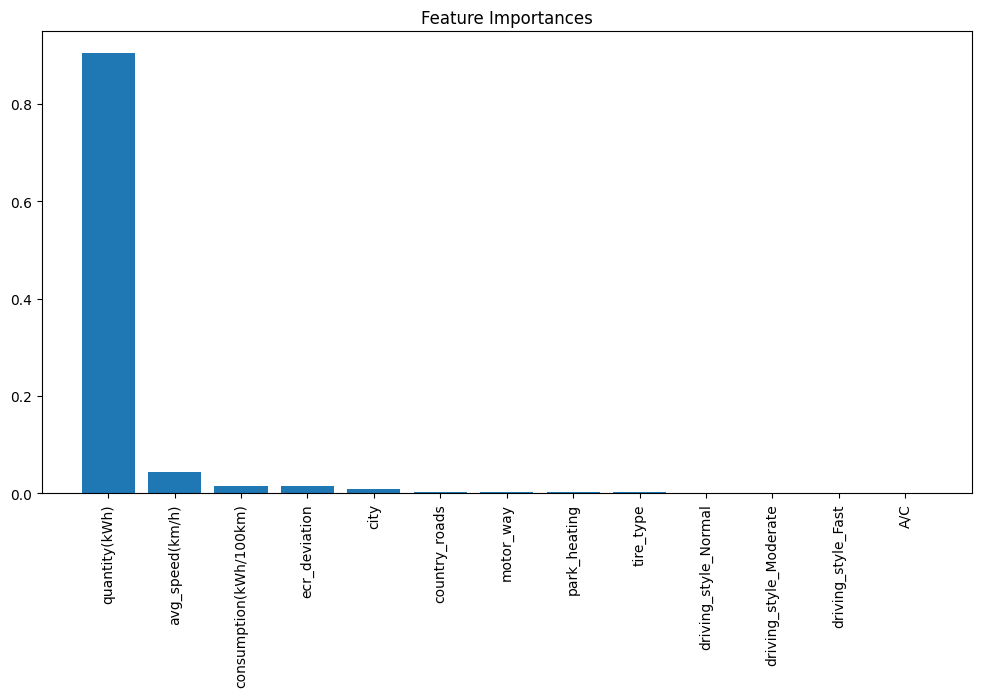

In [ ]:
import numpy as np
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
svr_regressor = SVR(kernel='linear')  # You can also use 'rbf', 'poly', etc.
svr_regressor.fit(X_train, y_train)
y_pred = svr_regressor.predict(X_test)
y_pred = svr_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Absolute Error: 10.821706053369214
Mean Squared Error: 437.4308214959401
R2 Score: 0.8618830770979063


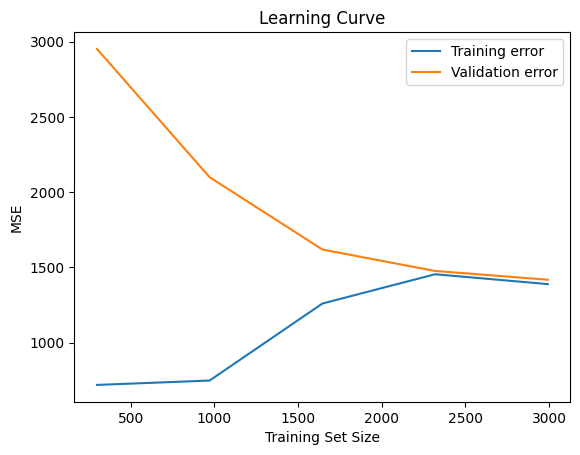

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(SVR(), X, y, cv=10, scoring="neg_mean_squared_error")

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training error")
plt.plot(train_sizes, test_scores_mean, label="Validation error")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.title("Learning Curve")
plt.legend()
plt.show()


Epoch 1/100
78/78 [==============================] - 2s 9ms/step - loss: 1919.7893 - mae: 24.1447 - val_loss: 1453.0955 - val_mae: 21.6416
Epoch 2/100
78/78 [==============================] - 0s 5ms/step - loss: 806.0162 - mae: 15.2408 - val_loss: 529.7357 - val_mae: 13.0753
Epoch 3/100
78/78 [==============================] - 0s 4ms/step - loss: 399.8873 - mae: 11.2221 - val_loss: 393.5610 - val_mae: 12.4681
Epoch 4/100
78/78 [==============================] - 0s 5ms/step - loss: 326.1350 - mae: 10.1846 - val_loss: 360.7109 - val_mae: 11.9309
Epoch 5/100
78/78 [==============================] - 1s 11ms/step - loss: 303.2789 - mae: 9.9141 - val_loss: 332.8178 - val_mae: 10.6797
Epoch 6/100
78/78 [==============================] - 1s 11ms/step - loss: 293.8807 - mae: 10.0926 - val_loss: 332.6920 - val_mae: 10.8536
Epoch 7/100
78/78 [==============================] - 0s 4ms/step - loss: 290.7308 - mae: 10.2028 - val_loss: 323.3794 - val_mae: 11.8037
Epoch 8/100
78/78 [===================

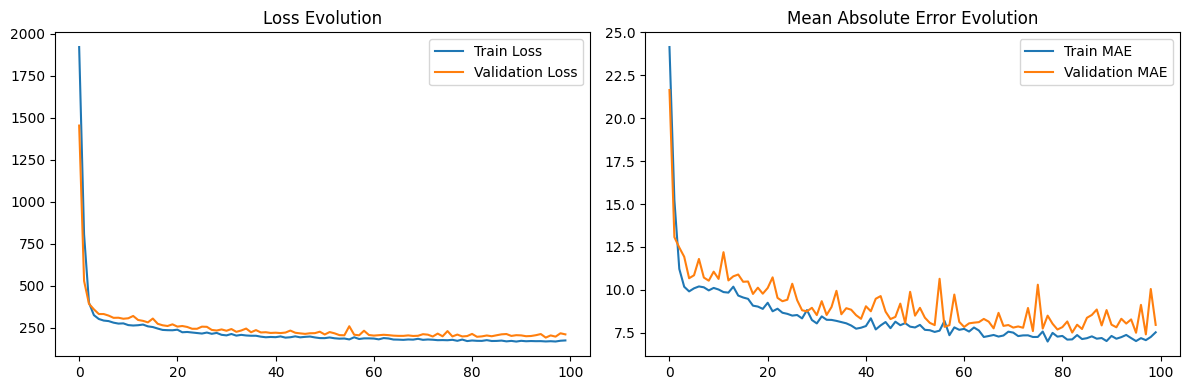

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 1. Set up the model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(128, activation='relu'),     # Dense layer with 128 neurons
    layers.Dense(64, activation='relu'),      # Another dense layer with 64 neurons
    layers.Dense(1)                           # Output layer with 1 neuron (since it's regression)
])

# 2. Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 3. Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# 4. Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on Test Set: {mae}")

# 5. Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.legend()
plt.title('Mean Absolute Error Evolution')

plt.tight_layout()
plt.show()


In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on Test Set: {mae}")

26/26 [==============================] - 0s 2ms/step - loss: 194.3021 - mae: 7.2369
Mean Absolute Error on Test Set: 7.236929893493652


,trip_distance(km),quantity(kWh),city,country_roads,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,driving_style_Fast,driving_style_Moderate,driving_style_Normal
1,50.0,12.29,0,1,15.5,0,1,47.0,-1.3,0,0,1
2,43.0,8.68,0,1,18.0,0,1,58.0,1.2,0,0,1
3,44.0,1.50,0,1,16.1,0,1,43.0,-0.7,0,0,1
4,76.0,14.44,0,0,19.0,0,1,76.0,2.2,0,0,1
5,15.0,6.84,1,0,16.1,0,1,23.0,-0.7,0,0,1
6,63.0,7.10,0,0,18.3,0,1,80.0,1.5,1,0,0
7,85.0,15.30,0,1,18.0,0,1,47.0,1.2,1,0,0
8,71.0,13.77,0,1,19.4,0,1,45.0,2.6,1,0,0
9,76.0,14.26,0,1,15.8,0,1,78.0,-1.0,0,0,1
10,80.0,13.08,0,1,14.0,0,0,52.0,-2.8,0,1,0


Epoch 1/100
78/78 [==============================] - 3s 11ms/step - loss: 2011.6083 - mae: 24.7452 - val_loss: 936.6447 - val_mae: 19.0055
Epoch 2/100
78/78 [==============================] - 1s 7ms/step - loss: 444.6078 - mae: 12.5624 - val_loss: 319.1105 - val_mae: 11.2918
Epoch 3/100
78/78 [==============================] - 0s 4ms/step - loss: 310.5083 - mae: 11.2615 - val_loss: 336.7847 - val_mae: 11.4736
Epoch 4/100
78/78 [==============================] - 0s 5ms/step - loss: 292.2591 - mae: 10.9183 - val_loss: 353.6927 - val_mae: 11.6520
Epoch 5/100
78/78 [==============================] - 0s 4ms/step - loss: 285.4212 - mae: 10.5776 - val_loss: 287.4961 - val_mae: 11.3828
Epoch 6/100
78/78 [==============================] - 0s 4ms/step - loss: 268.9995 - mae: 10.1279 - val_loss: 293.0261 - val_mae: 11.9287
Epoch 7/100
78/78 [==============================] - 0s 4ms/step - loss: 259.4788 - mae: 10.0077 - val_loss: 269.6021 - val_mae: 10.5564
Epoch 8/100
78/78 [====================

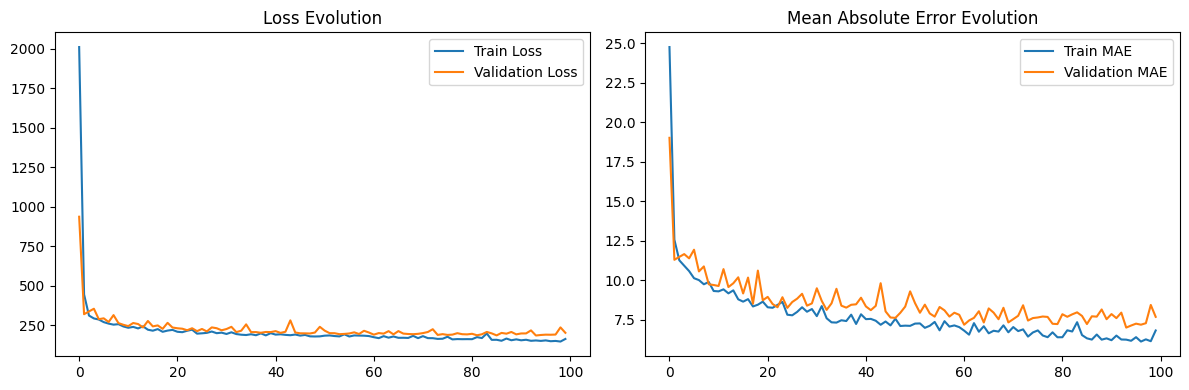

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Convert data to float32 for TensorFlow compatibility
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
from tensorflow.keras.optimizers import Adam
import numpy as np
# 1. Set up the model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(100, activation='elu'),     # Dense layer with 100 neurons
#     layers.Dropout(0.2),                      # Dropout layer
    layers.Dense(80, activation='elu'),      # Additional Dense layer with 80 neurons
#     layers.Dropout(0.2),                      # Dropout layer
    layers.Dense(50, activation='elu'),      # Dense layer with 50 neurons
#     layers.Dropout(0.2),                      # Dropout layer
    layers.Dense(25, activation='elu'),      # Dense layer with 25 neurons
#     layers.Dropout(0.2),                      # Dropout layer
    layers.Dense(13, activation='elu'),      # Dense layer with 13 neurons
#     layers.Dropout(0.2),                      # Dropout layer
    layers.Dense(7, activation='elu'),       # Dense layer with 7 neurons
#     layers.Dropout(0.2),                      # Dropout layer
    layers.Dense(1, activation='linear')      # Output layer with 1 neuron (since it's regression)
])

# 2. Compile the model
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
# 3. Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)




# 4. Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on Test Set: {mae}")
# Calculate predictions
y_pred = model.predict(X_test)

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
amae= mean_absolute_error(y_test,y_pred)
# Calculate RMSE
rmse = np.sqrt(mse)

print(f"R2 Score: {r2}")
print(f"MAPE: {mape}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"Mae:{amae}")
# 5. Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.legend()
plt.title('Mean Absolute Error Evolution')

plt.tight_layout()
plt.show()


26/26 [==============================] - 0s 2ms/step


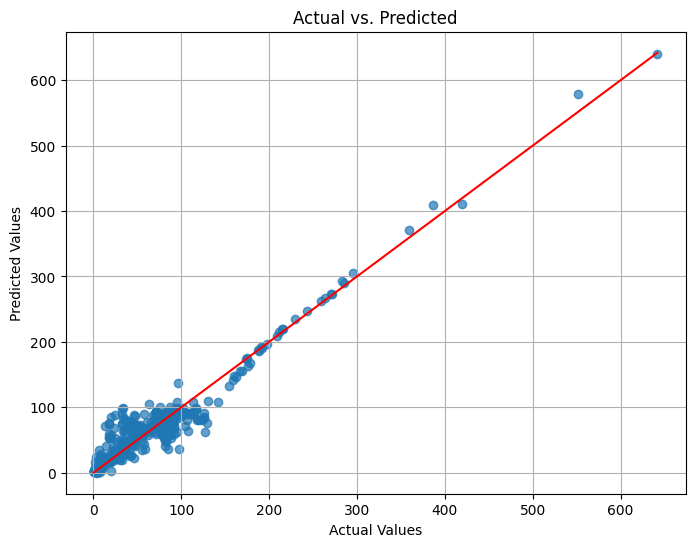

In [ ]:
# 6. Predict on the test set
y_pred = model.predict(X_test)

# 7. Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
predictions_np = model.predict(X_test)

# Flatten the predictions array
predictions_np = predictions_np.flatten()

26/26 [==============================] - 0s 2ms/step


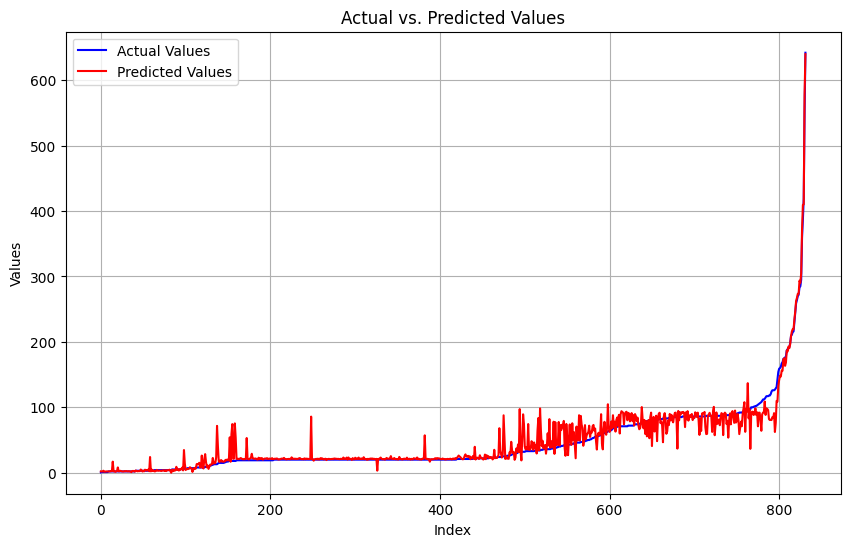

In [ ]:
# Convert the pandas Series to a numpy array
y_test_np = y_test.to_numpy()

# Sort the values for a meaningful line plot
sorted_indices = np.argsort(y_test_np)
sorted_y_test = y_test_np[sorted_indices]
sorted_predictions = predictions_np[sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sorted_y_test, label="Actual Values", color='blue')
plt.plot(sorted_predictions, label="Predicted Values", color='red')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Continous federated learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Convert data to float32 for TensorFlow compatibility
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


shuffle_idx = np.random.permutation(len(X_train))
X_train_shuffled = X_train.iloc[shuffle_idx].values   # Convert to numpy arrays
y_train_shuffled = y_train.iloc[shuffle_idx].values

# # Split each client's data into training and validation
validation_split = 0.2  # 20% validation split
num_clients = 5
# client_train_data = {}
# client_val_data = {}

# for i in range(num_clients):
#     start_idx = int(i * len(X_train) / num_clients)
#     end_idx = int((i + 1) * len(X_train) / num_clients)

#     X_client, y_client = X_train[start_idx:end_idx], y_train[start_idx:end_idx]

#     X_client_train, X_client_val, y_client_train, y_client_val = train_test_split(
#         X_client, y_client, test_size=validation_split, random_state=42
#     )

#     client_train_data[f"client_{i+1}"] = {
#         "X": X_client_train,
#         "y": y_client_train
#     }

#     client_val_data[f"client_{i+1}"] = {
#         "X": X_client_val,
#         "y": y_client_val
#     }
# Define the number of samples for each client
client_sample_counts = [300, 500, 200, 600, 400]

# Ensure the sum of client_sample_counts does not exceed the total number of samples
assert sum(client_sample_counts) <= len(X_train), "Total client samples exceed the available training samples!"

client_train_data = {}
client_val_data = {}

current_idx = 0
for i, sample_count in enumerate(client_sample_counts):
    start_idx = current_idx
    end_idx = start_idx + sample_count
    current_idx = end_idx

    X_client, y_client = X_train_shuffled[start_idx:end_idx], y_train_shuffled[start_idx:end_idx]

    X_client_train, X_client_val, y_client_train, y_client_val = train_test_split(
        X_client, y_client, test_size=validation_split, random_state=42
    )

    client_train_data[f"client_{i+1}"] = {
        "X": X_client_train,
        "y": y_client_train
    }

    client_val_data[f"client_{i+1}"] = {
        "X": X_client_val,
        "y": y_client_val
    }

# Check the number of samples for each client
for client, data in client_train_data.items():
    print(f"{client} training has {len(data['X'])} samples.")

for client, data in client_val_data.items():
    print(f"{client} validation has {len(data['X'])} samples.")


# Check the number of samples for each client
for client, data in client_train_data.items():
    print(f"{client}training has {len(data['X'])} samples.")

for client, data in client_val_data.items():
    print(f"{client}validation has {len(data['X'])} samples.")

# Define the TensorFlow regression model
def create_regression_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation='elu', input_shape=(input_dim,)),
        # tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(80, activation='elu'),
        # tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(50, activation='elu'),

        tf.keras.layers.Dense(25, activation='elu'),

        tf.keras.layers.Dense(13, activation='elu'),
        # tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(7, activation='elu'),

        tf.keras.layers.Dense(1)
    ])
    return model

# Create a global model
input_dim = X_train.shape[1]
global_model = create_regression_model(input_dim)

client_train_datasets = [tf.data.Dataset.from_tensor_slices((data["X"], data["y"])) for _, data in client_train_data.items()]
client_val_datasets = [tf.data.Dataset.from_tensor_slices((data["X"], data["y"])) for _, data in client_val_data.items()]

client_1 training has 240 samples.
client_2 training has 400 samples.
client_3 training has 160 samples.
client_4 training has 480 samples.
client_5 training has 320 samples.
client_1 validation has 60 samples.
client_2 validation has 100 samples.
client_3 validation has 40 samples.
client_4 validation has 120 samples.
client_5 validation has 80 samples.
client_1training has 240 samples.
client_2training has 400 samples.
client_3training has 160 samples.
client_4training has 480 samples.
client_5training has 320 samples.
client_1validation has 60 samples.
client_2validation has 100 samples.
client_3validation has 40 samples.
client_4validation has 120 samples.
client_5validation has 80 samples.


In [ ]:
def average_weights(models,client_train_data):
    # Extract the weights from the first model to initialize the average weights
    avg_weights = [np.zeros(w.shape) for w in models[0].get_weights()]

    # Get the total number of samples across all clients
    total_samples = sum([len(data["X"]) for data in client_train_data.values()])

    # Compute the weighted average for each model's weights
    for model, data in zip(models, client_train_data.values()):
        num_samples = len(data["X"])
        for idx, w in enumerate(model.get_weights()):
            avg_weights[idx] += w * num_samples / total_samples

    return avg_weights


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
import numpy as np
num_rounds = 50
lr, epochs, batch_size = 0.001, 5, 32
min= 10000
best_round= -1
for round_num in range(num_rounds):
    print(f"Round {round_num + 1}/{num_rounds}")

    # Create client models by copying weights from the global model
    client_models = [create_regression_model(input_dim) for _ in range(num_clients)]
    for client_model in client_models:
        client_model.set_weights(global_model.get_weights())

    # Train each client model on its data
    for idx, (model, train_data, val_data) in enumerate(zip(client_models, client_train_datasets, client_val_datasets)):
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='mean_squared_error')

        # Train the model using data and validate
        history = model.fit(train_data.batch(batch_size),
                            validation_data=val_data.batch(batch_size),
                            epochs=epochs, verbose=1)

        train_loss = history.history['loss'][-1]
        val_loss = history.history['val_loss'][-1]

        print(f"Client {idx + 1} training completed. Train Loss: {train_loss}, Validation Loss: {val_loss}")

    # Aggregate the weights after training
    global_weights = average_weights(client_models, client_train_data)

    # Update the global model with the new weights
    global_model.set_weights(global_weights)
    from tensorflow.keras.optimizers import Adam

# Compile the model again (only if you're certain it's the trained model)
    global_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# For evaluation, use the following:
    loss = global_model.evaluate(X_test, y_test, verbose=0)
    #print(f"Loss on Test Set after Federated Learning: {loss}")

# Get predictions
    predictions_np = global_model.predict(X_test)

# Flatten the predictions array
    predictions_np1 = predictions_np.flatten()

# Calculate mean absolute error
    mae = mean_absolute_error(y_test, predictions_np1)
    print(f"Mean Absolute Error on Test Set after Federated Learning: {mae}")
    if mae<min:
      min = mae
      best_round = round_num + 1
      mape=mean_absolute_percentage_error(y_test, predictions_np1)
      r2 = r2_score(y_test, predictions_np)
print(f"Best MAE: {min} observed in round {best_round}")
print(f"Mape: {mape}")
print(f"r2_score: {r2}")

Round 1/50
Epoch 1/5
8/8 [==============================] - 1s 21ms/step - loss: 203.9658 - val_loss: 422.6863
Epoch 2/5
8/8 [==============================] - 0s 5ms/step - loss: 166.3369 - val_loss: 337.5089
Epoch 3/5
8/8 [==============================] - 0s 4ms/step - loss: 164.5459 - val_loss: 324.8067
Epoch 4/5
8/8 [==============================] - 0s 5ms/step - loss: 142.8697 - val_loss: 345.6624
Epoch 5/5
8/8 [==============================] - 0s 5ms/step - loss: 131.9408 - val_loss: 333.8384
Client 1 training completed. Train Loss: 131.94078063964844, Validation Loss: 333.8384094238281
Epoch 1/5
13/13 [==============================] - 2s 15ms/step - loss: 179.3608 - val_loss: 178.0045
Epoch 2/5
13/13 [==============================] - 0s 4ms/step - loss: 131.4844 - val_loss: 177.6124
Epoch 3/5
13/13 [==============================] - 0s 4ms/step - loss: 110.6167 - val_loss: 171.4962
Epoch 4/5
13/13 [==============================] - 0s 13ms/step - loss: 103.1164 - val_loss: 

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

num_rounds = 50
lr, epochs, batch_size = 0.001, 10, 32
min_mae = 10000
best_round = -1

# Define the FedProx loss function
def fedprox_loss_fn(global_model_weights, local_model_trainable_weights, mu=0.1):
    def fedprox_loss(y_true, y_pred):
        mse_loss = tf.keras.losses.mean_squared_error(y_true, y_pred)
        proximal_loss = tf.add_n([tf.reduce_sum(tf.square(w_local - w_global))
                                  for w_local, w_global in zip(local_model_trainable_weights, global_model_weights)])
        return mse_loss + (mu / 2.0) * proximal_loss
    return fedprox_loss

for round_num in range(num_rounds):
    print(f"Round {round_num + 1}/{num_rounds}")

    # Create client models by copying weights from the global model
    client_models = [create_regression_model(input_dim) for _ in range(num_clients)]
    for client_model in client_models:
        client_model.set_weights(global_model.get_weights())

    # Train each client model on its data
    for idx, (model, train_data, val_data) in enumerate(zip(client_models, client_train_datasets, client_val_datasets)):
        # Compile the model with FedProx loss function
        global_weights = global_model.get_weights()  # Get the latest global model weights
        model.compile(
            optimizer=Adam(learning_rate=lr),
            loss=fedprox_loss_fn(global_weights, model.trainable_weights, mu=0.1)
        )

        # Train the model using client's data
        history = model.fit(
            train_data.batch(batch_size),
            validation_data=val_data.batch(batch_size),
            epochs=epochs, verbose=1
        )
        train_loss = history.history['loss'][-1]
        val_loss = history.history['val_loss'][-1]
        print(f"Client {idx + 1} training completed. Train Loss: {train_loss}, Validation Loss: {val_loss}")

    # Aggregate the weights after training
    global_weights = average_weights(client_models, client_train_data)

    # Update the global model with the new weights
    global_model.set_weights(global_weights)

# Compile the global model
global_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Evaluate the global model on the test set
loss = global_model.evaluate(X_test, y_test, verbose=0)
print(f"Loss on Test Set after Federated Learning: {loss}")

# Get predictions
predictions_np = global_model.predict(X_test)

# Flatten the predictions array
predictions_np1 = predictions_np.flatten()

# Calculate mean absolute error
mae = mean_absolute_error(y_test, predictions_np1)
print(f"Mean Absolute Error on Test Set after Federated Learning: {mae}")
if mae < min_mae:
    min_mae = mae
    best_round = round_num + 1
    mape = mean_absolute_percentage_error(y_test, predictions_np1)
    r2 = r2_score(y_test, predictions_np)

print(f"Best MAE: {min_mae} observed in round {best_round}")
print(f"Mape: {mape}")
print(f"r2_score: {r2}")

Streaming output truncated to the last 5000 lines.
10/10 [==============================] - 0s 5ms/step - loss: 277.3018 - val_loss: 279.6999
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 273.2231 - val_loss: 278.9406
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 269.4535 - val_loss: 277.7977
Epoch 8/10
10/10 [==============================] - 0s 5ms/step - loss: 266.3749 - val_loss: 277.6624
Epoch 9/10
10/10 [==============================] - 0s 5ms/step - loss: 264.2963 - val_loss: 277.5870
Epoch 10/10
10/10 [==============================] - 0s 5ms/step - loss: 262.9022 - val_loss: 277.0375
Client 5 training completed. Train Loss: 262.90216064453125, Validation Loss: 277.03753662109375
Round 4/50
Epoch 1/10
8/8 [==============================] - 2s 31ms/step - loss: 320.8896 - val_loss: 468.4030
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 273.6066 - val_loss: 473.4364
Epoch 3/10
8/8 [======================

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model again (only if you're certain it's the trained model)
global_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# For evaluation, use the following:
loss = global_model.evaluate(X_test, y_test, verbose=0)
print(f"Loss on Test Set after Federated Learning: {loss}")

# Get predictions
predictions_np = global_model.predict(X_test)

# Flatten the predictions array
predictions_np = predictions_np.flatten()

# Calculate mean absolute error
mae = mean_absolute_error(y_test, predictions_np)
print(f"Mean Absolute Error on Test Set after Federated Learning: {mae}")


Loss on Test Set after Federated Learning: 2427.5087890625
26/26 [==============================] - 0s 2ms/step
Mean Absolute Error on Test Set after Federated Learning: 18.54945587252195
